In [27]:
import seaborn as sns
import json
import pandas as pd

### Load json log files from experiments

In [18]:
ROOT_PATH="../../outputs/cifar10-CC-HP-explore/{atk}_tau{tau}_l{n_iter}_seed{seed}/stats"

def read_json(path):
    print(path)
    validation = []
    with open(path, "r") as f:
        for line in f:
            line=line.strip().replace("'", '"')
            data = json.loads(line)
            if data['_meta']['type'] == 'validation':
                validation.append(data)
    return validation

# Loop over hyperparameters
data_collection = {}
# TODO:
# for seed in [0, 1, 2]: 
for seed in [0]:
    for attack in ["LF", "BF"]:
        for tau in [1e-1, 1e1, 1e3]:
            for inner in [1, 3, 5]:
                path = ROOT_PATH.format(atk=attack, tau=tau, n_iter=inner, seed=seed)
                data_collection[path] = read_json(path)


../../outputs/cifar10-CC-HP-explore/LF_tau0.1_l1_seed0/stats
../../outputs/cifar10-CC-HP-explore/LF_tau0.1_l3_seed0/stats
../../outputs/cifar10-CC-HP-explore/LF_tau0.1_l5_seed0/stats
../../outputs/cifar10-CC-HP-explore/LF_tau10.0_l1_seed0/stats
../../outputs/cifar10-CC-HP-explore/LF_tau10.0_l3_seed0/stats
../../outputs/cifar10-CC-HP-explore/LF_tau10.0_l5_seed0/stats
../../outputs/cifar10-CC-HP-explore/LF_tau1000.0_l1_seed0/stats
../../outputs/cifar10-CC-HP-explore/LF_tau1000.0_l3_seed0/stats
../../outputs/cifar10-CC-HP-explore/LF_tau1000.0_l5_seed0/stats
../../outputs/cifar10-CC-HP-explore/BF_tau0.1_l1_seed0/stats
../../outputs/cifar10-CC-HP-explore/BF_tau0.1_l3_seed0/stats
../../outputs/cifar10-CC-HP-explore/BF_tau0.1_l5_seed0/stats
../../outputs/cifar10-CC-HP-explore/BF_tau10.0_l1_seed0/stats
../../outputs/cifar10-CC-HP-explore/BF_tau10.0_l3_seed0/stats
../../outputs/cifar10-CC-HP-explore/BF_tau10.0_l5_seed0/stats
../../outputs/cifar10-CC-HP-explore/BF_tau1000.0_l1_seed0/stats
../../

In [23]:
# Example of data entries
for k, v in data_collection.items():
    for _, item in zip(range(3), v):
        print(item)
    break

{'_meta': {'type': 'validation'}, 'E': 1, 'Length': 9984, 'Loss': 2.0887270050171094, 'top1': 17.89863782051282}
{'_meta': {'type': 'validation'}, 'E': 2, 'Length': 9984, 'Loss': 1.8979881818477924, 'top1': 24.028445512820515}
{'_meta': {'type': 'validation'}, 'E': 3, 'Length': 9984, 'Loss': 1.8248003751803668, 'top1': 28.79607371794872}


In [24]:
# Generate a dataframe

def transform(entry, atk, tau, n_iter, seed):
    # {'_meta': {'type': 'validation'}, 'E': 1, 'Length': 9984, 'Loss': 2.0887, 'top1': 17.8986}
    return {
        'Epochs': entry['E'],
        'Accuracy (%)': entry['top1'],
        'Attack': atk,
        '#InnerLoops': n_iter,
        'seed': seed,
        r'$\tau$': tau
    }


df = []
# TODO: for seed in [0, 1, 2]: 
for seed in [0]:
    for attack in ["LF", "BF"]:
        for tau in [1e-1, 1e1, 1e3]:
            for inner in [1, 3, 5]:
                path = ROOT_PATH.format(atk=attack, tau=tau, n_iter=inner, seed=seed)
                # Elements of `validation_entries`: {'_meta': {'type': 'validation'}, 'E': 1, 'Length': 9984, 'Loss': 2.0887270050171094, 'top1': 17.89863782051282}
                validation_entries = data_collection[path]
                df += list(map(lambda x: transform(x, atk=attack, tau=tau, n_iter=inner, seed=seed), validation_entries))     

In [28]:
df = pd.DataFrame(df)

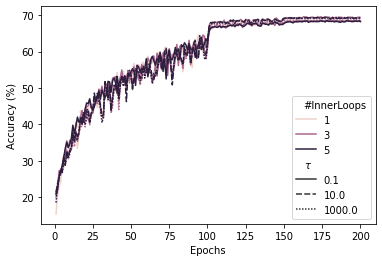

In [35]:
# NOTE: here we exclude ci (confidence interval) for speed.
g = sns.lineplot(data=df, x="Epochs", y="Accuracy (%)", hue="#InnerLoops", style=r"$\tau$", ci=None)

In [40]:
df_final = df[df['Epochs'] == 200]
df_final.head()

,Epochs,Accuracy (%),Attack,#InnerLoops,seed,$\tau$
199,200,77.493990,LF,1,0,0.1
399,200,77.654247,LF,3,0,0.1
599,200,77.293670,LF,5,0,0.1
799,200,78.435497,LF,1,0,10.0
999,200,78.405449,LF,3,0,10.0


In [41]:
df_final

,Epochs,Accuracy (%),Attack,#InnerLoops,seed,$\tau$
199,200,77.493990,LF,1,0,0.1
399,200,77.654247,LF,3,0,0.1
599,200,77.293670,LF,5,0,0.1
799,200,78.435497,LF,1,0,10.0
999,200,78.405449,LF,3,0,10.0
1199,200,78.325321,LF,5,0,10.0
1399,200,78.375401,LF,1,0,1000.0
1599,200,77.524038,LF,3,0,1000.0
1799,200,78.585737,LF,5,0,1000.0
1999,200,59.545272,BF,1,0,0.1


In [ ]:
def dataframe_to_latextable(df):
    pass